# Kwadratury Newtona-Cotesa


In [1]:
using DataFrames, CSV, Plots, QuadGK, Polynomials

Złożona metoda trapezów:

In [2]:
function CompositeTrapezoid(f,n,a,b)
h=(b-a)/n
xs=LinRange(a,b,n+1)
ys=f.(xs)
ys[1]*=0.5
ys[n+1]*=0.5
return Float64(h*sum(ys))
end

CompositeTrapezoid (generic function with 1 method)

Złożona metoda Simpsona:

In [3]:
function CompositeSimpson(f,n,a,b)
h=(b-a)/n
xs=LinRange(a,b,n+1)
ys=f.(xs)
ys[2:2:n]*=4.0
ys[3:2:n-1]*=2.0
return Float64(h/3*sum(ys))
end

CompositeSimpson (generic function with 1 method)

Funkcja testowa:

In [4]:
function Test(f,a,b,n)
T=Float64[]
S=Float64[]
T2=Float64[]
S2=Float64[]

for i in 2:10:n
	push!(T,CompositeTrapezoid(f,i,a,b))
	push!(S,CompositeSimpson(f,i,a,b))
end

wynik=Float64(quadgk(f,a,b)[1])
println(wynik)
Te=Float64[]
Se=Float64[]

for i in 1:length(T)
	push!(Te, abs(wynik-T[i])/abs(wynik))
	push!(Se, abs(wynik-S[i])/abs(wynik))
end

df=DataFrame(n=1:10:n, Trapezoid=T, Error_T=Te,Simpson=S, Error_S=Se)
    
df[!, :Error_T] = round.(df[:,:Error_T,], digits=12)
df[!, :Error_S] = round.(df[:,:Error_S,], digits=12)

println(df)
x = 2:10:n; y1=[Te, Se]
CSV.write(string("d01.csv"),df)
    
plot(x,y1, xscale=:log10, label=["Trapezoid" "Simpson"], markersize=1, xlabel="Liczba węzłów", ylabel="Wartość błędu",titlefontsize=10,title="Zależność między liczbą węzłów a wartością błędu \n dla metody Simpsona i metody trapezów", marker=true;)

end

Test (generic function with 1 method)

In [5]:
f1(x)=(x-1)^2*(x-2)*(x-3)^3*(x-4)

f1 (generic function with 1 method)

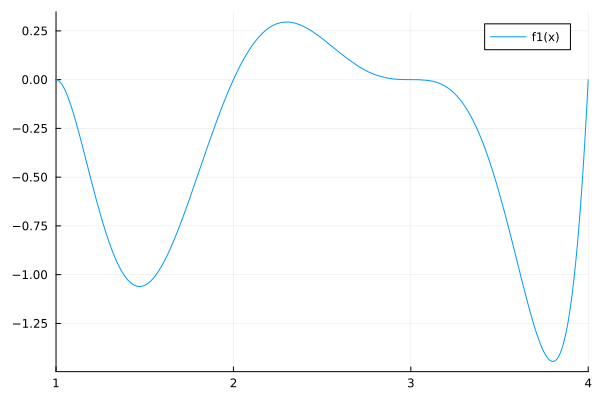

In [6]:
plot(f1, xlims=(1,4), label="f1(x)")

In [7]:
savefig("f1_plot.png")

"C:\\Users\\PC\\f1_plot.png"

Sprawdzamy ograniczenia na błąd dla f1(x) wynikające z szacowań błędu interpolacji:

In [8]:
using Polynomials

p=fromroots([1,1,2,3,3,3,4])
function max_deriv(p,a,b,k)
d=derivative(p,k)
X=roots(d)
#X=filter(x->(x.im==0),X)
X=Float64.(X)
X=filter(x->(x>=a && x<=b),X)
X=p.(X)
push!(X,d(a))
push!(X,d(b))
X=abs.(X)
return findmax(X)[1]
end


md2=max_deriv(p,1,4,2)
md4=max_deriv(p,1,4,4)
#Maksymalny błąd dla 291 węzłów:
println("Trapezoid:", md2*2^3/(12*291^2), "\nSimpson:", md4*2^5/(180*291^4))

Trapezoid:0.001180902445648965
Simpson:6.30699699758118e-8


-1.0607142857142862
30×5 DataFrame
 Row │ n      Trapezoid  Error_T      Simpson    Error_S     
     │ Int64  Float64    Float64      Float64    Float64     
─────┼───────────────────────────────────────────────────────
   1 │     1   0.316406  1.2983        0.421875  1.39773
   2 │    11  -0.968811  0.0866428    -1.05347   0.00683265
   3 │    21  -1.03299   0.0261414    -1.06006   0.000615039
   4 │    31  -1.04757   0.0123944    -1.06057   0.000137912
   5 │    41  -1.05307   0.00720335   -1.06066   4.65382e-5
   6 │    51  -1.05573   0.00470187   -1.06069   1.98191e-5
   7 │    61  -1.0572    0.00330849   -1.0607    9.8105e-6
   8 │    71  -1.05811   0.00245376   -1.06071   5.39544e-6
   9 │    81  -1.05871   0.00189201   -1.06071   3.2075e-6
  10 │    91  -1.05912   0.00150319   -1.06071   2.02449e-6
  11 │   101  -1.05942   0.00122297   -1.06071   1.33998e-6
  12 │   111  -1.05964   0.00101438   -1.06071   9.2183e-7
  13 │   121  -1.05981   0.000854934  -1.06071   6.5479e-7
  14

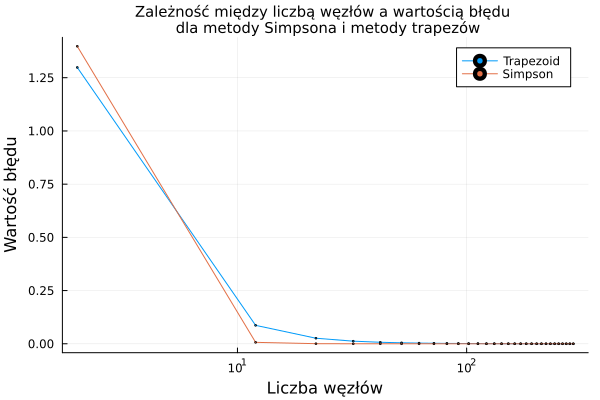

In [9]:
Test(f1,1,4,300)

In [10]:
savefig("f_1.png")

"C:\\Users\\PC\\f_1.png"

In [11]:
f2(x)=(x-1)*(x-3)*(x+1)*(x+5)^2*(x-9)*(x+7)*(x-7)*(x+5.5)

f2 (generic function with 1 method)

In [12]:
p=fromroots([1,3,-1,-5,-5,9,-7,7,-5.5])
md2=max_deriv(p,-5,5,2)
md4=max_deriv(p,-5,5,4)
#Maksymalny błąd dla 291 węzłów:
println("Trapezoid:", md2*10^3/(12*191^2), "\nSimpson:", md4*10^5/(180*191^4))

Trapezoid:7840.231222543266
Simpson:0.9799753840644903


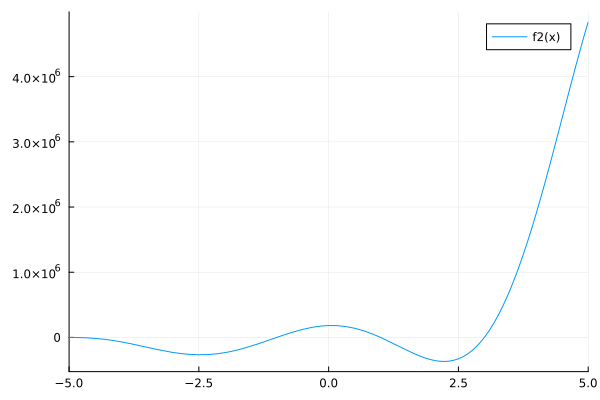

In [13]:
plot(f2, xlims=(-5,5), label="f2(x)")

3.40069841269841e6
20×5 DataFrame
 Row │ n      Trapezoid  Error_T      Simpson    Error_S    
     │ Int64  Float64    Float64      Float64    Float64    
─────┼──────────────────────────────────────────────────────
   1 │     1  1.30056e7  2.82438      9.27675e6  1.7279
   2 │    11  3.55622e6  0.0457333    3.38898e6  0.00344504
   3 │    21  3.44637e6  0.0134306    3.39968e6  0.00029856
   4 │    31  3.42222e6  0.00632957   3.40047e6  6.63628e-5
   5 │    41  3.41318e6  0.00367028   3.40062e6  2.23196e-5
   6 │    51  3.40884e6  0.00239311   3.40067e6  9.48995e-6
   7 │    61  3.40642e6  0.0016829    3.40068e6  4.69336e-6
   8 │    71  3.40494e6  0.00124766   3.40069e6  2.57977e-6
   9 │    81  3.40397e6  0.000961798  3.40069e6  1.53307e-6
  10 │    91  3.4033e6   0.000764012  3.4007e6   9.67395e-7
  11 │   101  3.40281e6  0.000621513  3.4007e6   6.40189e-7
  12 │   111  3.40245e6  0.00051546   3.4007e6   4.40355e-7
  13 │   121  3.40218e6  0.000434407  3.4007e6   3.12759e-7
  14 │ 

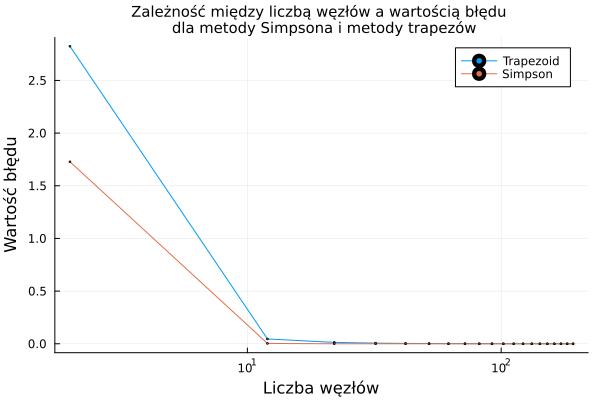

In [14]:
Test(f2,-5,5,200)

1.980198019801978e99
30×5 DataFrame
 Row │ n      Trapezoid    Error_T     Simpson      Error_S     
     │ Int64  Float64      Float64     Float64      Float64     
─────┼──────────────────────────────────────────────────────────
   1 │     1  1.0e101      49.5        6.66667e100  32.6667
   2 │    11  1.66667e100   7.41667    1.11111e100   4.61111
   3 │    21  9.09223e99    3.59158    6.06237e99    2.06149
   4 │    31  6.2697e99     2.1662     4.19292e99    1.11742
   5 │    41  4.83476e99    1.44155    3.27146e99    0.652086
   6 │    51  4.00107e99    1.02054    2.76894e99    0.398316
   7 │    61  3.47726e99    0.756016   2.48034e99    0.252573
   8 │    71  3.12915e99    0.580222   2.30813e99    0.165604
   9 │    81  2.8874e99     0.458136   2.20185e99    0.111932
  10 │    91  2.71336e99    0.370247   2.1342e99     0.0777694
  11 │   101  2.58427e99    0.305055   2.08989e99    0.0553949
  12 │   111  2.48607e99    0.255463   2.0601e99     0.040351
  13 │   121  2.40974e99    

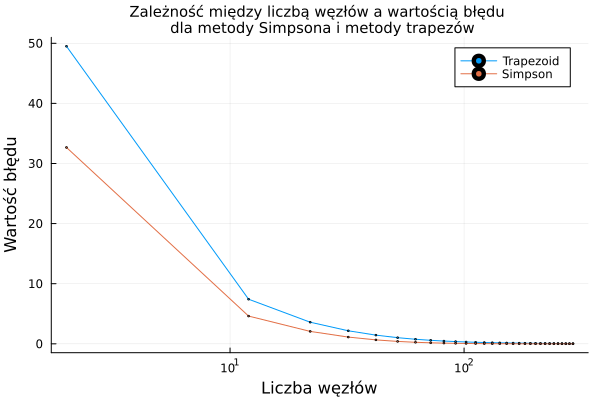

In [15]:
f3(x)=x^100+3x^50+67x^33-9x^20-17x^15+18x^18-9x+13
Test(f3,-10,10,300)

In [16]:
savefig("f3.png")

"C:\\Users\\PC\\f3.png"

In [17]:
g1(x)=1/(1+25x^2)

g1 (generic function with 1 method)

0.5493603067780064
10×5 DataFrame
 Row │ n      Trapezoid  Error_T      Simpson   Error_S     
     │ Int64  Float64    Float64      Float64   Float64     
─────┼──────────────────────────────────────────────────────
   1 │     1   1.03846   0.89031      1.35897   1.47374
   2 │    11   0.549688  0.000596113  0.54036   0.0163827
   3 │    21   0.54926   0.00018291   0.549778  0.000760841
   4 │    31   0.549312  8.75897e-5   0.549342  3.30628e-5
   5 │    41   0.549332  5.08629e-5   0.549361  1.3372e-6
   6 │    51   0.549342  3.31859e-5   0.54936   9.6016e-8
   7 │    61   0.549347  2.33459e-5   0.54936   1.455e-8
   8 │    71   0.549351  1.73121e-5   0.54936   9.579e-9
   9 │    81   0.549353  1.33475e-5   0.54936   5.624e-9
  10 │    91   0.549354  1.06038e-5   0.54936   3.554e-9


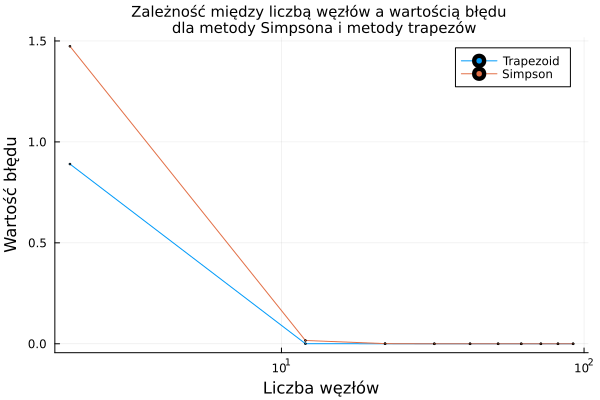

In [18]:
Test(g1,-1,1,100)

In [19]:
savefig("runge1.png")

"C:\\Users\\PC\\runge1.png"

0.6278185312596194
100×5 DataFrame
 Row │ n      Trapezoid    Error_T   Simpson      Error_S  
     │ Int64  Float64      Float64   Float64      Float64  
─────┼─────────────────────────────────────────────────────
   1 │     1  0.000975692  0.998446  0.000946757  0.998492
   2 │    11  0.00996267   0.984131  0.00889423   0.985833
   3 │    21  0.0186945    0.970223  0.0167211    0.973366
   4 │    31  0.0274122    0.956337  0.0245408    0.960911
   5 │    41  0.0361172    0.942472  0.0323515    0.94847
   6 │    51  0.0448066    0.928631  0.0401503    0.936048
   7 │    61  0.0534772    0.914821  0.0479345    0.923649
   8 │    71  0.0621255    0.901045  0.0557013    0.911278
   9 │    81  0.070748     0.887311  0.0634481    0.898939
  10 │    91  0.0793414    0.873624  0.0711721    0.886636
  11 │   101  0.0879021    0.859988  0.0788706    0.874374
  12 │   111  0.096427     0.846409  0.0865411    0.862156
  13 │   121  0.104913     0.832893  0.094181     0.849987
  14 │   131  0.113

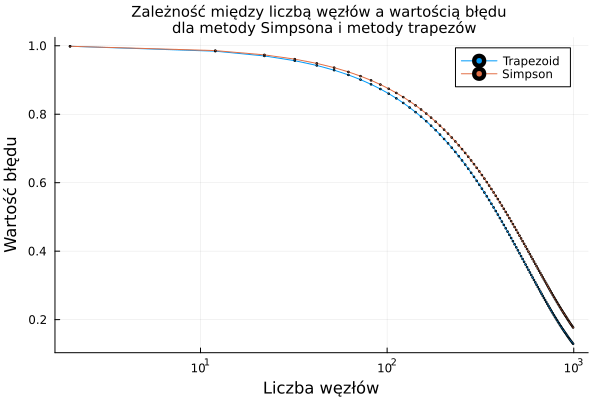

In [20]:
Test(g1,-400,100,1000)

In [21]:
savefig("runge2.png")

"C:\\Users\\PC\\runge2.png"

In [22]:
g2(x)=(-5280+6208*x-778*x^2-159*x^3+8*x^4+x^5)/(x^2+1)

g2 (generic function with 1 method)

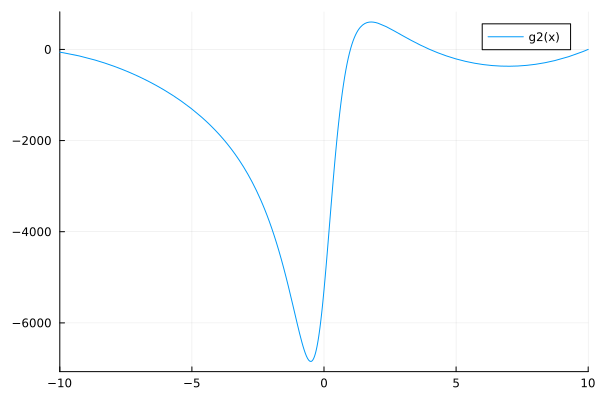

In [23]:
plot(g2, xlims=(-10,10), label="g2(x)")


In [24]:
savefig("g2plot.png")

"C:\\Users\\PC\\g2plot.png"

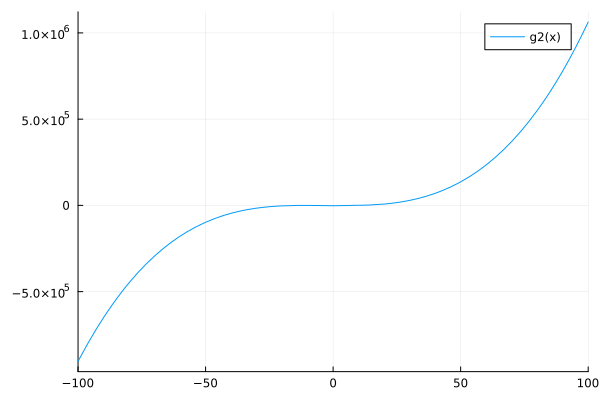

In [25]:
plot(g2, xlims=(-100,100), label="g2(x)")


In [26]:
savefig("g2plot2.png")

"C:\\Users\\PC\\g2plot2.png"

-23609.162203308635
20×5 DataFrame
 Row │ n      Trapezoid  Error_T      Simpson   Error_S     
     │ Int64  Float64    Float64      Float64   Float64     
─────┼──────────────────────────────────────────────────────
   1 │     1   -53105.0  1.24934      -70603.3  1.9905
   2 │    11   -24197.4  0.0249141    -22812.6  0.0337404
   3 │    21   -23614.1  0.000207919  -23934.7  0.0137883
   4 │    31   -23599.4  0.000413998  -23548.6  0.00256452
   5 │    41   -23602.8  0.000267997  -23622.1  0.000545978
   6 │    51   -23605.0  0.000176189  -23606.5  0.000112954
   7 │    61   -23606.2  0.000124001  -23609.7  2.34977e-5
   8 │    71   -23607.0  9.19516e-5   -23609.0  4.88759e-6
   9 │    81   -23607.5  7.08922e-5   -23609.2  1.01377e-6
  10 │    91   -23607.8  5.63185e-5   -23609.2  2.12172e-7
  11 │   101   -23608.1  4.5817e-5    -23609.2  4.317e-8
  12 │   111   -23608.3  3.80007e-5   -23609.2  9.613e-9
  13 │   121   -23608.4  3.20264e-5   -23609.2  1.548e-9
  14 │   131   -23608.5  

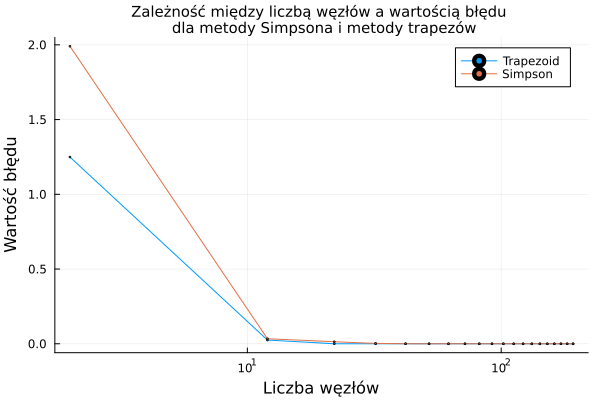

In [27]:
Test(g2,-10,10,200)

5.33174722471378e9
20×5 DataFrame
 Row │ n      Trapezoid  Error_T      Simpson    Error_S    
     │ Int64  Float64    Float64      Float64    Float64    
─────┼──────────────────────────────────────────────────────
   1 │     1  7.99393e9  0.499309     5.32577e9  0.00112119
   2 │    11  5.40509e9  0.0137552    5.33126e9  9.10244e-5
   3 │    21  5.35339e9  0.00405945   5.33122e9  9.95443e-5
   4 │    31  5.3419e9   0.00190363   5.33157e9  3.25237e-5
   5 │    41  5.33759e9  0.00109658   5.33148e9  5.09166e-5
   6 │    51  5.33553e9  0.000710022  5.33165e9  1.90484e-5
   7 │    61  5.33439e9  0.000495819  5.33157e9  3.36765e-5
   8 │    71  5.33369e9  0.000365052  5.33168e9  1.30773e-5
   9 │    81  5.33324e9  0.000279507  5.33161e9  2.48574e-5
  10 │    91  5.33292e9  0.000220562  5.3317e9   9.71634e-6
  11 │   101  5.3327e9   0.000178271  5.33164e9  1.95058e-5
  12 │   111  5.33253e9  0.000146928  5.33171e9  7.56715e-6
  13 │   121  5.3324e9   0.000123074  5.33166e9  1.59163e-5
  1

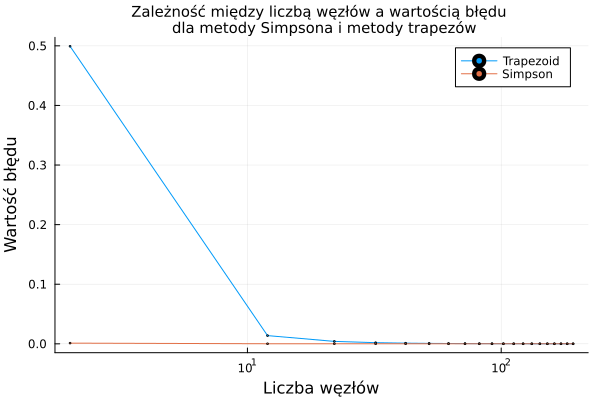

In [28]:
Test(g2,-1000,1000,200)

In [29]:
savefig("f_1.png")

"C:\\Users\\PC\\f_1.png"

In [30]:
g3(x)=20x/(x^2+2)

g3 (generic function with 1 method)

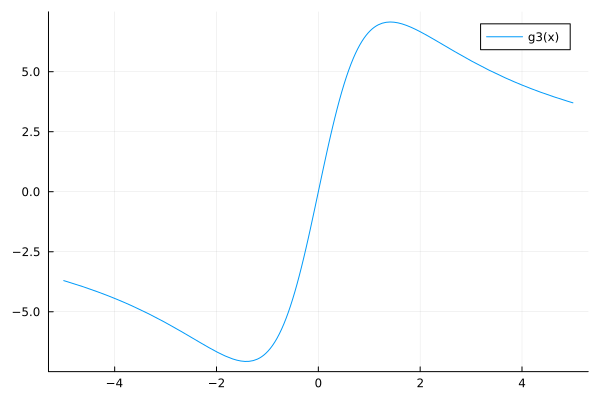

In [31]:
plot(g3, label="g3(x)")

-19537.45942663514
20×5 DataFrame
 Row │ n      Trapezoid  Error_T      Simpson   Error_S     
     │ Int64  Float64    Float64      Float64   Float64     
─────┼──────────────────────────────────────────────────────
   1 │     1   -30194.2  0.545453     -37729.5  0.931136
   2 │    11   -19535.6  9.72883e-5   -19335.2  0.0103509
   3 │    21   -19532.4  0.000256568  -19546.9  0.000480713
   4 │    31   -19535.1  0.000121986  -19537.1  2.08897e-5
   5 │    41   -19536.1  7.08238e-5   -19537.5  8.44867e-7
   6 │    51   -19536.6  4.6206e-5    -19537.5  6.0665e-8
   7 │    61   -19536.8  3.2504e-5    -19537.5  9.193e-9
   8 │    71   -19537.0  2.41027e-5   -19537.5  6.052e-9
   9 │    81   -19537.1  1.85827e-5   -19537.5  3.553e-9
  10 │    91   -19537.2  1.47627e-5   -19537.5  2.245e-9
  11 │   101   -19537.2  1.201e-5     -19537.5  1.486e-9
  12 │   111   -19537.3  9.96116e-6   -19537.5  1.023e-9
  13 │   121   -19537.3  8.39514e-6   -19537.5  7.26e-10
  14 │   131   -19537.3  7.17135e

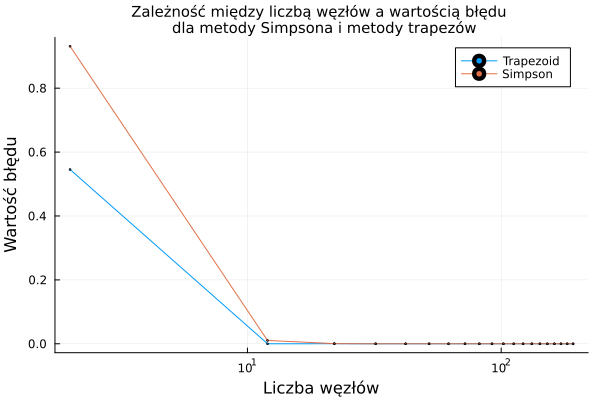

In [32]:
Test(g2,-5,5,200)

In [33]:
h1(x)=((sin(x))^10+13sin(x)cos(x)-(cos(x))^3)/((cos(x))^7+3)

h1 (generic function with 1 method)

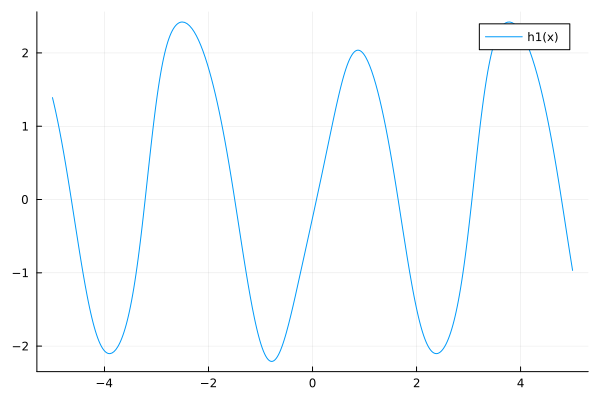

In [34]:
plot(h1, label="h1(x)")

In [35]:
savefig("h1.png")

"C:\\Users\\PC\\h1.png"

2.5418752588885054
20×5 DataFrame
 Row │ n      Trapezoid  Error_T      Simpson   Error_S     
     │ Int64  Float64    Float64      Float64   Float64     
─────┼──────────────────────────────────────────────────────
   1 │     1  -0.309491  1.12176      -1.87299  1.73686
   2 │    11   2.90728   0.143753      3.41346  0.34289
   3 │    21   2.33983   0.0794882     2.36602  0.0691821
   4 │    31   2.51663   0.00993055    2.6424   0.0395477
   5 │    41   2.52099   0.00821843    2.5678   0.0101986
   6 │    51   2.52883   0.00513059    2.50823  0.013238
   7 │    61   2.53283   0.00355831    2.53968  0.000863663
   8 │    71   2.53518   0.00263588    2.54115  0.000287182
   9 │    81   2.53671   0.00203173    2.54079  0.000426851
  10 │    91   2.53777   0.00161319    2.54199  4.33258e-5
  11 │   101   2.53854   0.00131159    2.54215  0.000107284
  12 │   111   2.53911   0.00108744    2.54192  1.61532e-5
  13 │   121   2.53955   0.000916198   2.54187  2.3438e-6
  14 │   131   2.53989  

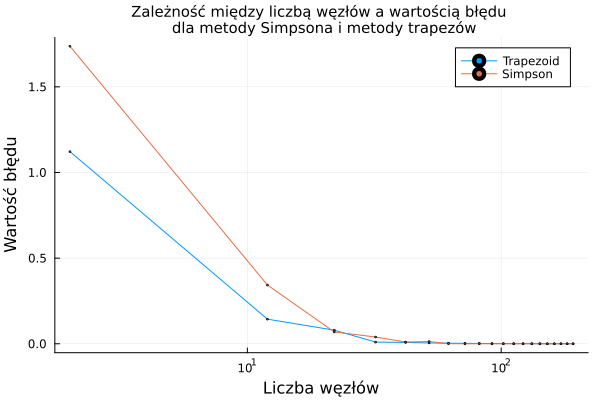

In [36]:
Test(h1,-10,10,200)

In [37]:
h2(x)=((sin(x))^9-(sin(x))^2cos(x)+(cos(x))^5)/((cos(x))^6+(sin(x))^7)

h2 (generic function with 1 method)

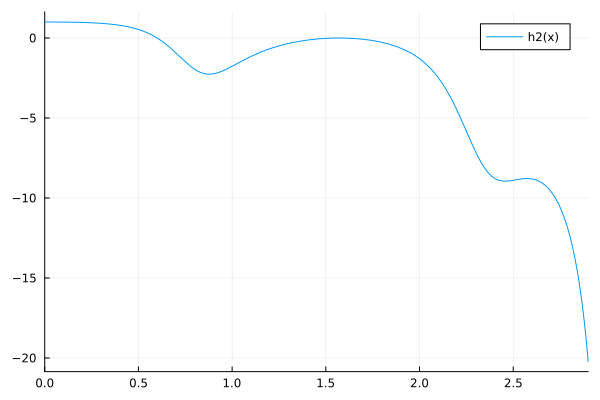

In [38]:
plot(h2, xlims=(0,2.9), label="h2(x)")

In [39]:
savefig("h2.png")

"C:\\Users\\PC\\h2.png"

-7.825444729744817
20×5 DataFrame
 Row │ n      Trapezoid  Error_T      Simpson   Error_S     
     │ Int64  Float64    Float64      Float64   Float64     
─────┼──────────────────────────────────────────────────────
   1 │     1  -14.0263   0.792394     -9.41385  0.20298
   2 │    11   -8.38881  0.071991     -7.84546  0.00255739
   3 │    21   -8.01179  0.0238131    -7.84116  0.0020087
   4 │    31   -7.91587  0.0115557    -7.83275  0.000933396
   5 │    41   -7.87851  0.00678144   -7.82829  0.00036346
   6 │    51   -7.86025  0.00444822   -7.82677  0.000168968
   7 │    61   -7.85001  0.00313878   -7.82613  8.73826e-5
   8 │    71   -7.84369  0.00233196   -7.82583  4.9428e-5
   9 │    81   -7.83953  0.00180018   -7.82568  2.99542e-5
  10 │    91   -7.83665  0.00143138   -7.82559  1.91673e-5
  11 │   101   -7.83456  0.00116523   -7.82555  1.28156e-5
  12 │   111   -7.83301  0.000966908  -7.82551  8.8843e-6
  13 │   121   -7.83182  0.000815197  -7.82549  6.34829e-6
  14 │   131   -7.83

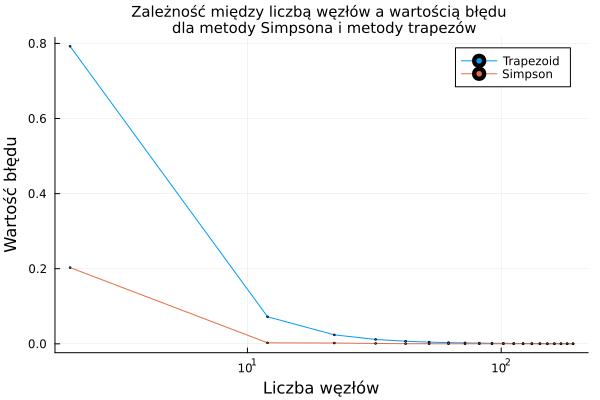

In [40]:
Test(h2,0,2.9,200)

In [41]:
h3(x)=((sin(x))^10+127*cos(x)^3)/(10+sin(x))


h3 (generic function with 1 method)

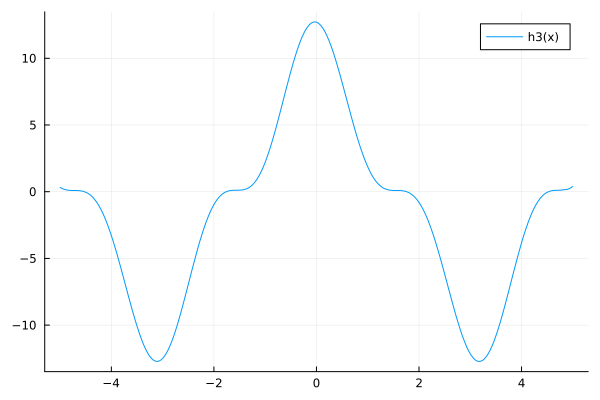

In [42]:
plot(h3,label="h3(x)")

In [43]:
savefig("h3.png")

"C:\\Users\\PC\\h3.png"

-15.419744337321289
20×5 DataFrame
 Row │ n      Trapezoid  Error_T      Simpson   Error_S     
     │ Int64  Float64    Float64      Float64   Float64     
─────┼──────────────────────────────────────────────────────
   1 │     1    36.5562  3.37074       58.2375  4.77681
   2 │    11   -14.4708  0.0615406    -15.6152  0.0126755
   3 │    21   -15.1437  0.0179042    -15.4302  0.000681065
   4 │    31   -15.2899  0.00841985   -15.4222  0.000156123
   5 │    41   -15.3445  0.00487854   -15.4205  5.14407e-5
   6 │    51   -15.3707  0.00317974   -15.4201  2.1664e-5
   7 │    61   -15.3853  0.00223562   -15.4199  1.06574e-5
   8 │    71   -15.3942  0.00165724   -15.4198  5.83898e-6
   9 │    81   -15.4     0.00127742   -15.4198  3.46251e-6
  10 │    91   -15.4041  0.00101467   -15.4198  2.18167e-6
  11 │   101   -15.407   0.000825389  -15.4198  1.44222e-6
  12 │   111   -15.4092  0.000684527  -15.4198  9.91243e-7
  13 │   121   -15.4108  0.000576876  -15.4198  7.03596e-7
  14 │   131   -15

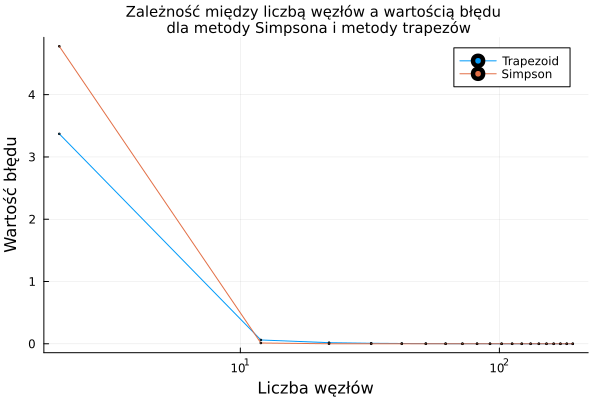

In [44]:
Test(h3,-4,4,200)

In [45]:
function prec_t(f,a,b,p)
n=2
w=CompositeTrapezoid(f,n,a,b)
wynik=Float64(quadgk(f,a,b)[1])
while (abs((wynik-w)/wynik)>p)
    n=n+10
    w=CompositeTrapezoid(f,n,a,b)
    end
end



function prec_s(f,a,b,p)
n=2
w=CompositeSimpson(f,n,a,b)
wynik=Float64(quadgk(f,a,b)[1])
while (abs((wynik-w)/wynik)>p)
    n=n+10
    w=CompositeSimpson(f,n,a,b)
    end
end

prec_s (generic function with 1 method)

In [46]:
a=@time prec_t(f1,1,2,10^(-10))
b=@time prec_s(f1,1,2,10^(-10))
println(a/b)

  0.627041 seconds (94.31 k allocations: 1.031 GiB, 14.70% gc time)
  0.000143 seconds (878 allocations: 286.125 KiB)


In [47]:
@time prec_t(f2,1,2,10^(-10))
@time prec_s(f2,1,2,10^(-10))

  0.207228 seconds (50.40 k allocations: 303.845 MiB, 14.36% gc time)
  0.000054 seconds (251 allocations: 28.109 KiB)


In [48]:
@time prec_t(g1,1,2,10^(-10))
@time prec_s(g1,1,2,10^(-10))

  0.574599 seconds (93.87 k allocations: 1.022 GiB, 13.33% gc time)
  0.000070 seconds (441 allocations: 78.031 KiB)


In [49]:
@time prec_t(g2,1,2,10^(-10))
@time prec_s(g2,1,2,10^(-10))

  3.842209 seconds (114.09 k allocations: 1.507 GiB, 2.97% gc time)
  0.000088 seconds (365 allocations: 54.922 KiB)


In [50]:
@time prec_t(g3,1,2,10^(-10))
@time prec_s(g3,1,2,10^(-10))

  0.203954 seconds (43.01 k allocations: 154.150 MiB, 9.66% gc time, 54.83% compilation time)
  0.000044 seconds (194 allocations: 17.969 KiB)


In [51]:
@time prec_t(h1,1,2,10^(-10))
@time prec_s(h1,1,2,10^(-10))

 11.537328 seconds (110.99 k allocations: 1.427 GiB, 0.89% gc time)
  0.000171 seconds (310 allocations: 40.688 KiB)


In [52]:
@time prec_t(h2,1,2,10^(-10))
@time prec_s(h2,1,2,10^(-10))

146.532879 seconds (294.46 k allocations: 9.828 GiB, 0.41% gc time, 0.03% compilation time)
  0.000910 seconds (728 allocations: 199.234 KiB)


In [53]:
@time prec_t(h3,1,2,10^(-10))
@time prec_s(h3,1,2,10^(-10))

 18.805978 seconds (178.33 k allocations: 3.673 GiB, 1.31% gc time)
  0.000230 seconds (574 allocations: 127.375 KiB)
